<a href="https://colab.research.google.com/github/Nik-Kras/ToMnet-N/blob/main/PyGame_render.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.4 MB/s 


In [10]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys

# set SDL to use the dummy NULL video driver, 
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

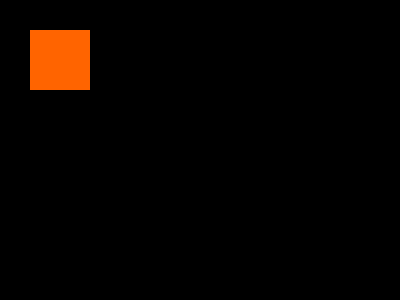

In [17]:
import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
done = False
is_blue = True
x = 30
y = 30

for event in pygame.event.get():
        if event.type == pygame.QUIT:
                done = True

color = (255, 100, 0)
pygame.draw.rect(screen, color, pygame.Rect(x, y, 60, 60))

pygame.display.flip()

#convert image so it can be displayed in OpenCV
view = pygame.surfarray.array3d(screen)

#  convert from (width, height, channel) to (height, width, channel)
view = view.transpose([1, 0, 2])

#  convert from rgb to bgr
img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

#Display image, clear cell every 0.5 seconds
cv2_imshow(img_bgr)

In [ ]:
# Importing the environment to the Colab!

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class TilesClass:
    """
    tiles - stores all possible states of cells representing patterns of walls
            for Grid World
    titleProbability - stores probability for each state to appear. It is a way to
                        adjust how many walls will be placed and which wall
                        structure would be prefered
    """

    def __init__(self):

        """
        List of all available tiles where Tile_0 ... Tile_6 are defined tiles
        and Tile_10 is a tile of undefined cells (which are not collapsed)
        """
        self.ListOfTiles = ["Tile_0", "Tile_1", "Tile_2", "Tile_3", "Tile_4",
                            "Tile_5", "Tile_6", "Tile_10"]

        self.tiles = {
            "Tile_0": np.array([[0, 0, 0],
                                [0, 0, 0],
                                [0, 0, 0]]),

            "Tile_1": np.array([[0, 1, 0],
                                [0, 1, 1],
                                [0, 1, 0]]),

            "Tile_2": np.array([[0, 0, 0],
                                [1, 1, 1],
                                [0, 1, 0]]),

            "Tile_3": np.array([[0, 1, 0],
                                [1, 1, 0],
                                [0, 1, 0]]),

            "Tile_4": np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 0, 0]]),

            "Tile_5": np.array([[0, 0, 0],
                                [1, 1, 1],
                                [0, 0, 0]]),

            "Tile_6": np.array([[0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0]]),

            "Tile_10": np.array([[1, 1, 1],
                                 [1, 1, 1],
                                 [1, 1, 1]]),
        }

        self.tileProbability = [0] * 8
        self.tileProbability[0] = 26
        self.tileProbability[1] = 9
        self.tileProbability[2] = 9
        self.tileProbability[3] = 9
        self.tileProbability[4] = 9
        self.tileProbability[5] = 20
        self.tileProbability[6] = 20
        self.tileProbability[7] = 0

        """
        The dictionary that stores options for neighbours of each Tile.
        When a Tiles is assigned to a certain state, all neighbour options must
        be updated according to the rules stored here. Therefore, entropy is
        propagated among the cells.
        """
        self.Connection = {
            "wall": {
                "UP": ["Tile_0", "Tile_4", "Tile_5"],
                "RIGHT": ["Tile_0", "Tile_1", "Tile_6"],
                "DOWN": ["Tile_0", "Tile_2", "Tile_5"],
                "LEFT": ["Tile_0", "Tile_3", "Tile_6"]
            },
            "path": {
                "UP": ["Tile_1", "Tile_2", "Tile_3", "Tile_6"],
                "RIGHT": ["Tile_2", "Tile_3", "Tile_4", "Tile_5"],
                "DOWN": ["Tile_1", "Tile_3", "Tile_4", "Tile_6"],
                "LEFT": ["Tile_1", "Tile_2", "Tile_4", "Tile_5"]
            }
        }

        self.connectionRules = {
            "Tile_0": {
                "UP": self.Connection["wall"]["UP"],
                "RIGHT": self.Connection["wall"]["RIGHT"],
                "DOWN": self.Connection["wall"]["DOWN"],
                "LEFT": self.Connection["wall"]["LEFT"]
            },
            "Tile_1": {
                "UP": self.Connection["path"]["UP"],
                "RIGHT": self.Connection["path"]["RIGHT"],
                "DOWN": self.Connection["path"]["DOWN"],
                "LEFT": self.Connection["wall"]["LEFT"]
            },
            "Tile_2": {
                "UP": self.Connection["wall"]["UP"],
                "RIGHT": self.Connection["path"]["RIGHT"],
                "DOWN": self.Connection["path"]["DOWN"],
                "LEFT": self.Connection["path"]["LEFT"]
            },
            "Tile_3": {
                "UP": self.Connection["path"]["UP"],
                "RIGHT": self.Connection["wall"]["RIGHT"],
                "DOWN": self.Connection["path"]["DOWN"],
                "LEFT": self.Connection["path"]["LEFT"]
            },
            "Tile_4": {
                "UP": self.Connection["path"]["UP"],
                "RIGHT": self.Connection["path"]["RIGHT"],
                "DOWN": self.Connection["wall"]["DOWN"],
                "LEFT": self.Connection["path"]["LEFT"]
            },
            "Tile_5": {
                "UP": self.Connection["wall"]["UP"],
                "RIGHT": self.Connection["path"]["RIGHT"],
                "DOWN": self.Connection["wall"]["DOWN"],
                "LEFT": self.Connection["path"]["LEFT"]
            },
            "Tile_6": {
                "UP": self.Connection["path"]["UP"],
                "RIGHT": self.Connection["wall"]["RIGHT"],
                "DOWN": self.Connection["path"]["DOWN"],
                "LEFT": self.Connection["wall"]["LEFT"]
            }
        }

    """
    Draws all Tiles and shows probability for each of them
    """

    def DrawTiles(self):

        counter = 1
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle("Tiles", fontsize=16)

        for _, tile in self.tiles.items():
            ax = fig.add_subplot(3, 4, counter)
            ax.set_title("Tile_" + str(counter - 1))
            # ax.set_title("Prbability: " + str(self.tileProbability[counter-1]) + "%")
            plt.imshow(tile)
            counter = counter + 1
        plt.show()

    def getTile(self, index):
        if index in self.ListOfTiles:
            return self.tiles[index]
        else:
            print("Error! Wrong index was given. Expexted index: Tile_x where \
      x is 0, 1, ..., 6")


In [19]:
class Cell:
    """
    options - shows which states (from 0 to 6) are available for this cell
    collapsed - shows if the cell was collapsed, which means the state was defined
    state - shows which state was assigned to the cell (from 0 to 6), where
            10 means the state was not assigned yet
    """

    def __init__(self):
        self.options = [
            "Tile_0",
            "Tile_1",
            "Tile_2",
            "Tile_3",
            "Tile_4",
            "Tile_5",
            "Tile_6"
        ]
        self.collapsed = False
        self.state = "Tile_10"
        self.entropy = len(self.options)

    def getState(self):
        return self.state

    def getEntropy(self):
        self.entropy = len(self.options)
        return self.entropy

    def isCollapsed(self):
        return self.collapsed

    def setState(self, newState='Tile_0', method="direct"):

        if self.isCollapsed():
            print("The cell is already collapsed!")
            return

        if method == "random":
            newState = np.random.choice(self.options)
            # print("All options: ", self.options)
            # print("Random selection: ", newState)

        temporalTileObj = TilesClass()

        if newState in temporalTileObj.ListOfTiles:
            self.state = newState
        elif type(newState) == int:
            if 0 <= newState <= 6:
                self.state = temporalTileObj.ListOfTiles[newState]
            else:
                print("Error. The state index is out of range (0,6)")
        else:
            print("Error. Wrong state was given. Neither Tile name, nor Tile index")

        self.options = []
        self.entropy = 0
        self.collapsed = True


In [20]:
class Grid:
    """

    """

    def __init__(self, size):
        self.size = size
        self.Tiles = TilesClass()
        self.Cells = np.ndarray(shape=(size, size), dtype=Cell)
        self.CollapsedCells = 0
        self.Map = np.zeros(shape=(3 * size, 3 * size))

        for i in range(size):
            for j in range(size):
                self.Cells[i][j] = Cell()

    def DrawBoard(self, includeEntropy=False, tiles="separate", title=""):

        if tiles == "separate":
            counter = 1
            fig = plt.figure(figsize=(8, 8))
            if isinstance(title, str):
                fig.suptitle("Tiles", fontsize=16)
            elif isinstance(title, int):
                fig.suptitle(str(title) + "%", fontsize=16)


            for rowCell in self.Cells:
                for cell in rowCell:
                    cellState = cell.getState()

                    ax = fig.add_subplot(self.size, self.size, counter)
                    # ax.set_title(cellState)

                    if includeEntropy:
                        plt.text(0.7, 0.7, str(cell.getEntropy()), fontsize=12, color='w')

                    plt.axis('off')
                    plt.imshow(self.Tiles.getTile(cellState))

                    counter = counter + 1
            # fig.tight_layout()
            plt.show()
        elif tiles == "unite":
            plt.axis('off')
            plt.imshow(self.Map)
            plt.show()
        else:
            print("Error. Wrong tiles value was given!")

    """
    The function returns a cell with a lowest entropy
    """

    def LowestEntropy(self):
        lowestEntropy = 7
        lowestEntropyIndex = [0, 0]
        # previousCellCollapse = self.Cells[0][0].isCollapsed()

        for i in range(self.size):
            for j in range(self.size):
                cell = self.Cells[i][j]
                if not cell.isCollapsed() and cell.getEntropy() < lowestEntropy:
                    lowestEntropy = cell.getEntropy()
                    lowestEntropyIndex = [i, j]

        # print("Cell with lowest entropy: ", lowestEntropyIndex)
        # print("Is the cell collapsed?",
        #      self.Cells[lowestEntropyIndex[0]][lowestEntropyIndex[1]].isCollapsed())
        return lowestEntropyIndex

    def UpdateCellOptions(self, cellIndex, availableOptions):
        row = cellIndex[0]
        column = cellIndex[1]
        # print("Available options: ", availableOptions)
        # print("My options: ", self.Cells[row][column].options)

        if self.Cells[row][column].isCollapsed():
            # print("This cell is already collapsed")
            return
        else:
            copyOptions = self.Cells[row][column].options.copy()
            for option in copyOptions:
                if option in availableOptions:
                    continue
                else:
                    # print("I deleted an option: ", option)
                    self.Cells[row][column].options.remove(option)

            # print("Cell [", row, "][", column, "]. My new options: ", self.Cells[row][column].options)

    """
    cellIndex = [i, j] - Index (row and collumn) of the cell which neighbours
                          shpuld be updated
    """

    def UpdateOptionsOfOthers(self, cellIndex):
        row = cellIndex[0]
        column = cellIndex[1]
        collapsedCell = self.Cells[row][column]
        cellState = collapsedCell.getState()

        # Update cell above
        if row > 0:
            availableOptions = self.Tiles.connectionRules[cellState]["UP"]
            self.UpdateCellOptions([row - 1, column], availableOptions)

        # Update cell below
        if row < self.size - 1:
            availableOptions = self.Tiles.connectionRules[cellState]["DOWN"]
            self.UpdateCellOptions([row + 1, column], availableOptions)

        # Update cell to the right
        if column < self.size - 1:
            availableOptions = self.Tiles.connectionRules[cellState]["RIGHT"]
            self.UpdateCellOptions([row, column + 1], availableOptions)

        # Update cell to the right
        if column > 0:
            availableOptions = self.Tiles.connectionRules[cellState]["LEFT"]
            self.UpdateCellOptions([row, column - 1], availableOptions)

    def CollapseCell(self, cellIndex):
        row = cellIndex[0]
        column = cellIndex[1]
        self.Cells[row][column].setState(method="random")

    """
    Collapse one cell with the lowest entropy and changes available options 
    of neighbours (makes update according to assigned state)
    """

    def Update(self):
        # Chose the cell with lowest entropy
        index = self.LowestEntropy()
        # Collapse the cell, select one state for it
        self.CollapseCell(index)
        # Propagate entropy to neighbours, change their available options
        self.UpdateOptionsOfOthers(index)
        self.CollapsedCells = self.CollapsedCells + 1

    def GenerateMap(self, drawStages=False):
        maxNumberCollapsedCells = int(self.size * self.size)
        percentTHreshold = 10
        while self.CollapsedCells < maxNumberCollapsedCells:
            self.Update()
            percent = 100 * self.CollapsedCells / maxNumberCollapsedCells
            if percent > percentTHreshold or percent == 100:
                # print(f"The map is generated by {percent:.1f}%")
                if drawStages:
                    self.DrawBoard(includeEntropy=True, title=percentTHreshold)
                percentTHreshold = percentTHreshold + 10

        # Fill 2D array to save the whole map
        for i in range(self.size):
            for j in range(self.size):
                cell = self.Cells[i][j]
                state = cell.state
                cell2D = self.Tiles.tiles[state]

                for ii in range(3):
                    for jj in range(3):
                        row = i * 3 + ii
                        col = j * 3 + jj
                        self.Map[row][col] = cell2D[ii][jj]
        return self.Map

In [21]:
class GridWorld():

    def __init__(self, tot_row, tot_col, goal_rewards=None,
                 step_cost=-0.001, max_moves_per_episode=90,
                 consume_goals=2, shaffle=True):
        super().__init__()
        self.action_space_size = 4
        self.world_row = tot_row
        self.world_col = tot_col

        # Indexes for 3 map layers
        self.PlayerMap = 0
        self.WallMap = 1
        self.GoalMap = 2

        # Set the values to represent objects on the Map
        self.ObjSym = {
            "Wall": 0,
            "Path": 1,
            "Goal A": 2,
            "Goal B": 3,
            "Goal C": 4,
            "Goal D": 5,
            "Player": 10,
        }

        self.MapSym =[
            # self.PlayerMap
            {"Player": 1,
             "Other": 0},
            # self.WallMap
            {"Wall": 0,
             "Other": 1},
            # self.GoalMap
            {"Goal A": 1,
             "Goal B": 2,
             "Goal C": 3,
             "Goal D": 4,
             "Other": 0}
        ]

        self.GoalValue = {
            self.ObjSym["Goal A"]: 2,
            self.ObjSym["Goal B"]: 4,
            self.ObjSym["Goal C"]: 8,
            self.ObjSym["Goal D"]: 16,
        }

        # Value of the goal <-> name of the goal
        self.ValueGoal = {
            self.GoalValue[self.ObjSym["Goal A"]]: "Goal A",
            self.GoalValue[self.ObjSym["Goal B"]]: "Goal B",
            self.GoalValue[self.ObjSym["Goal C"]]: "Goal C",
            self.GoalValue[self.ObjSym["Goal D"]]: "Goal D",
        }

        # Originally agent was started as random, I changed to be deterministic ( [0.5, 0.5] -> [1, 0] )
        #self.transition_matrix = np.ones((self.action_space_size, self.action_space_size))/ self.action_space_size
        self.transition_matrix = np.eye(self.action_space_size)

        self.simple_map = np.ones((self.world_row, self.world_col), dtype=np.int16)

        self.state_matrix = [np.zeros((self.world_row, self.world_col), dtype=np.float16),
                             np.zeros((self.world_row, self.world_col), dtype=np.float16),
                             np.zeros((self.world_row, self.world_col), dtype=np.float16)]             # Environmental Map of walls and goals
        self.init_map = [" "] * self.world_row                          # Needed to save game
        self.consumed_goal = ""      # Needed to save game

        self.position = [np.random.randint(self.world_row), np.random.randint(self.world_col)]  # Indexes of Player position

        # Set the reward for each goal A, B, C, D.
        # It could differ for each agent,
        # So, at the beginning of the game it sets for an agent individually
        if goal_rewards is None:
            goal_rewards = [2, 4, 8, 16]
        self.goal_rewards = goal_rewards

        self.shaffle = shaffle
        self.consume_goals = consume_goals
        self.cnt_goal_picked = 0
        self.goal_picked = False

        # Set step cost in the environment
        # It could differ from experiment to experiment,
        # So, should be set at the beginning of the game
        self.step_cost = step_cost

        self.step_count = 0

        # Max number of moves after which player
        self.max_moves = max_moves_per_episode

        self.reward_punish = -20 # Previously was -1

    # Conditions to stop / terminate the game
    # def terminal(self):
    #     self.terminal = # condition to go out of the border
    #     self.episode_end = # condition to reach 90 moves ()
    #     return self.finished or self.episode_end

    def reset(self):
        """Return initial_time_step."""

        #print("The RESET was called")

        # Clear the Map
        empty_map = np.zeros((3, self.world_row, self.world_col))
        self.setStateMatrix(empty_map, set="all")

        # Create a new Map
        Generator = Grid(int(self.world_row / 3))  # How many 3x3 tiles should be put in the Map
        walls = Generator.GenerateMap()
        # print("Created Walls Map: ", walls)
        self.setStateMatrix(walls, set="walls")

        # Put player and goals on the map
        self.setPosition()

        # Clear step counter in the game
        self.step_count = 0

        # Set the initial map (for game saving)
        self.save_initial_map()

        dict_map = {"Player": np.expand_dims(self.state_matrix[self.PlayerMap], axis=0),
                    "Walls":  np.expand_dims(self.state_matrix[self.WallMap], axis=0),
                    "Goals":  np.expand_dims(self.state_matrix[self.GoalMap], axis=0)}

        # In the future, it should output Observed map (7x7), not "self.state_matrix"
        return dict_map

    def save_initial_map(self):

        for i in range(self.world_row):
            self.init_map[i] = '#'
            for j in range(self.world_col):
                if self.state_matrix[self.WallMap][i, j] == self.MapSym[self.WallMap]["Wall"]:
                    self.init_map[i] = self.init_map[i] + '#'
                elif self.state_matrix[self.PlayerMap][ i, j] == self.MapSym[self.PlayerMap]["Player"]:
                    self.init_map[i] = self.init_map[i] + 'O'
                elif self.state_matrix[self.GoalMap][ i, j] == self.MapSym[self.GoalMap]["Goal A"]:
                    self.init_map[i] = self.init_map[i] + 'A'
                elif self.state_matrix[self.GoalMap][ i, j] == self.MapSym[self.GoalMap]["Goal B"]:
                    self.init_map[i] = self.init_map[i] + 'B'
                elif self.state_matrix[self.GoalMap][ i, j] == self.MapSym[self.GoalMap]["Goal C"]:
                    self.init_map[i] = self.init_map[i] + 'C'
                elif self.state_matrix[self.GoalMap][ i, j] == self.MapSym[self.GoalMap]["Goal D"]:
                    self.init_map[i] = self.init_map[i] + 'D'
                else:
                    self.init_map[i] = self.init_map[i] + '-'
            self.init_map[i] = self.init_map[i] + '#'
        print("Initial Map:")
        print(self.init_map)


    def get_sight(self, sight, observability="partial"):
        self.simple_map = np.ones((self.world_row, self.world_col), dtype=np.int16)  # 0-wall, 1-path. Start with all path, then add walls, then add goals

        # Put walls
        for row in range(self.world_row):
            for col in range(self.world_col):
                if self.state_matrix[self.WallMap][row, col] == self.MapSym[self.WallMap]["Wall"]: self.simple_map[row, col] = self.ObjSym["Wall"]

        # Put goals
        for row in range(self.world_row):
            for col in range(self.world_col):
                if   self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal A"]: self.simple_map[row, col] = self.ObjSym["Goal A"]
                elif self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal B"]: self.simple_map[row, col] = self.ObjSym["Goal B"]
                elif self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal C"]: self.simple_map[row, col] = self.ObjSym["Goal C"]
                elif self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal D"]: self.simple_map[row, col] = self.ObjSym["Goal D"]

        if observability == "full":
            return self.position, self.simple_map

        result = np.full((sight, sight), None)

        half_sight = int(sight * 0.5)
        for i in range(sight):
            for j in range(sight):
                x = i + self.position[0] - half_sight
                y = j + self.position[1] - half_sight

                if -1 < x < self.world_row and -1 < y < self.world_col:
                    result[i, j] = self.simple_map[x, y]

        return self.position, result

    """
        Clears all the map, preparing for a new one
    """
    def clear(self):
        self.reset()

    def setStateMatrix(self, state_matrix, set="all"):
        """Set the obstacles, player and goals in the world.
        The input to the function is a matrix with the
        same size of the world
        """
        if set=="all":
            # if state_matrix.shape != self.state_matrix.shape:
            #     raise ValueError('The shape of the matrix does not match with the shape of the world.')
            self.state_matrix = state_matrix
        elif set=="player":
            if state_matrix.shape != self.state_matrix[self.PlayerMap].shape:
                raise ValueError('The shape of the matrix does not match with the shape of the world.')
            self.state_matrix[self.PlayerMap] = state_matrix
        elif set == "walls":
            print(state_matrix.shape)
            print(self.state_matrix[self.WallMap].shape)
            if state_matrix.shape != self.state_matrix[self.WallMap].shape:
                raise ValueError('The shape of the matrix does not match with the shape of the world.')
            self.state_matrix[self.WallMap] = state_matrix
        elif set=="goals":
            if state_matrix.shape != self.state_matrix[self.GoalMap].shape:
                raise ValueError('The shape of the matrix does not match with the shape of the world.')
            self.state_matrix[self.GoalMap] = state_matrix
        else:
            raise ValueError('The \'set\' parameter is wrong. Try: all, walls, player, goals')


    def setPosition(self):
        """ Set the position of a player and 4 Goals randomly
            But only on a walkable cells.
            !!! Before using this method make sure you generated walls and put them
                like game.setStateMatrix(state_matrix)
        """

        # 1. Put player on the map
        player_map = np.zeros((self.world_row, self.world_col), dtype=np.float16)
        cnt_of_tries = 0
        randomRow = 0
        randomCol = 0

        # Try random coordinates on the path, not walls
        while True:
            randomRow = np.random.randint(self.world_row)
            randomCol = np.random.randint(self.world_col)
            no_walls = self.state_matrix[self.WallMap][randomRow, randomCol] != self.MapSym[self.WallMap]["Wall"]
            # no_goals = elf.state_matrix[self.GoalMap, randomRow, randomCol] == self.MapSym[self.GoalMap]["Other"] # if no_walls and no_goals
            if no_walls:
                break

            # To prevent unsolvable maps (i.e. all walls)
            if cnt_of_tries > 10:
                self.reset()    # BUG: I should go out of loops, finish the function and then call reset(), as it will use setPosition automatically
                cnt_of_tries = 0
            else:
                cnt_of_tries += 1

        # Set the players position and record it on the map
        self.position = [randomRow, randomCol]  # Redundant
        player_map[randomRow, randomCol] = self.MapSym[self.PlayerMap]["Player"]
        self.setStateMatrix(player_map, set="player")

        # 2. Put Goals on the map
        goal_map = np.zeros((self.world_row, self.world_col), dtype=np.float16)
        Goals = self.MapSym[self.GoalMap].copy()
        Goals.popitem() # Remove "Others", so only Goal A - D are in the dictionary

        # EXAMPLE: key = "Goal A", value = 2
        for key, value in Goals.items():
            cnt_of_tries = 0
            while True:
                randomRow = np.random.randint(self.world_row)
                randomCol = np.random.randint(self.world_col)
                no_walls = self.state_matrix[self.WallMap][randomRow, randomCol] != self.MapSym[self.WallMap]["Wall"]
                no_goals = goal_map[randomRow, randomCol] == self.MapSym[self.GoalMap]["Other"]
                no_player = self.state_matrix[self.PlayerMap][randomRow, randomCol] == self.MapSym[self.PlayerMap]["Other"]
                if no_walls and no_goals and no_player:
                    break

                # To prevent unsolvable maps (i.e. all walls)
                if cnt_of_tries > 10:
                    self.reset()    # BUG: I should go out of loops, finish the function and then call reset(), as it will use setPosition automatically
                    cnt_of_tries = 0
                else:
                    cnt_of_tries += 1

            goal_map[randomRow, randomCol] = self.MapSym[self.GoalMap][key]

        # print("Created Goal Map: ", goal_map)
        self.setStateMatrix(goal_map, set="goals")

        """
        # Next objects must be placed on the path: Player, Goal 1, Goal 2, Goal 3, Goal 4
        objectsToPlace = [self.ObjSym["Player"], self.ObjSym["Goal A"], self.ObjSym["Goal B"],
                          self.ObjSym["Goal C"], self.ObjSym["Goal D"]]
        for obj in objectsToPlace:
            randomRow = np.random.randint(self.world_row)
            randomCol = np.random.randint(self.world_col)
            # Ensure that the obj is placed on the path
            # The coordinates will be changed until it finds a clear cell
            cnt_of_tries = 0
            while self.state_matrix[randomRow][randomCol] != self.ObjSym["Path"]:
                randomRow = np.random.randint(self.world_row)
                randomCol = np.random.randint(self.world_col)

                # If after 10 attempts the object was not placed - rebuild the map!
                if cnt_of_tries > 10:
                    self.reset()

                cnt_of_tries += 1
                # print(self.state_matrix[randomRow][randomCol])
            self.state_matrix[randomRow, randomCol] = obj    # Record obj position on the map
            # Save the player's position in the separate variable (could be reduced)
            if obj == self.ObjSym["Player"]:
                self.position = [randomRow, randomCol]
                
        """

    def getWorldState(self):
        return self.state_matrix

    def getPlayerPosition(self):
        return self.position

    def render(self):
        """ Print the current world in the terminal.
        O           represents the player's position
        -           represents empty states.
        #           represents obstacles
        A, B, C, D  represent goals
        """
        # FUTURE DEVELOPMENT: I can create graph in first two cycles!

        # 1. Create 1xROWxCOL map from 3xROWxCOL
        self.simple_map = np.ones((self.world_row, self.world_col), dtype=np.int16)  # 0-wall, 1-path. Start with all path, then add walls, then add goals

        # Put walls
        for row in range(self.world_row):
            for col in range(self.world_col):
                if self.state_matrix[self.WallMap][row, col] == self.MapSym[self.WallMap]["Wall"]: self.simple_map[row, col] = self.ObjSym["Wall"]

        # Put goals
        for row in range(self.world_row):
            for col in range(self.world_col):
                if   self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal A"]: self.simple_map[row, col] = self.ObjSym["Goal A"]
                elif self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal B"]: self.simple_map[row, col] = self.ObjSym["Goal B"]
                elif self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal C"]: self.simple_map[row, col] = self.ObjSym["Goal C"]
                elif self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal D"]: self.simple_map[row, col] = self.ObjSym["Goal D"]


        # 2. Draw a Map
        graph = ""
        for row in range(self.world_row):
            row_string = ""
            for col in range(self.world_col):

                # Draw player
                if self.position == [row, col]: row_string += u" \u25CB " # u" \u25CC "

                # Draw walls, paths and goals
                else:
                    if   self.simple_map[row, col] == self.ObjSym["Wall"]:   row_string += ' # '  # Wall
                    elif self.simple_map[row, col] == self.ObjSym["Path"]:   row_string += ' - '  # Path
                    elif self.simple_map[row, col] == self.ObjSym["Goal A"]: row_string += ' A '  # Goal 1
                    elif self.simple_map[row, col] == self.ObjSym["Goal B"]: row_string += ' B '  # Goal 2
                    elif self.simple_map[row, col] == self.ObjSym["Goal C"]: row_string += ' C '  # Goal 3
                    elif self.simple_map[row, col] == self.ObjSym["Goal D"]: row_string += ' D '  # Goal 4
                    else: print("ERROR: Incorrect map value! Position: " ,row, ", ", col)

            row_string += '\n'
            graph += row_string
        print(graph)

    def draw_map(self):

        # 1. Create 1xROWxCOL map from 3xROWxCOL
        self.simple_map = np.ones((self.world_row, self.world_col),
                                  dtype=np.int16)  # 0-wall, 1-path. Start with all path, then add walls, then add goals

        # Put walls
        for row in range(self.world_row):
            for col in range(self.world_col):
                if self.state_matrix[self.WallMap][row, col] == self.MapSym[self.WallMap]["Wall"]: self.simple_map[
                    row, col] = self.ObjSym["Wall"]

        # Put goals
        for row in range(self.world_row):
            for col in range(self.world_col):
                if self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal A"]:
                    self.simple_map[row, col] = self.ObjSym["Goal A"]
                elif self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal B"]:
                    self.simple_map[row, col] = self.ObjSym["Goal B"]
                elif self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal C"]:
                    self.simple_map[row, col] = self.ObjSym["Goal C"]
                elif self.state_matrix[self.GoalMap][row, col] == self.MapSym[self.GoalMap]["Goal D"]:
                    self.simple_map[row, col] = self.ObjSym["Goal D"]

        # Put player
        for row in range(self.world_row):
            for col in range(self.world_col):
                if self.state_matrix[self.PlayerMap][row, col] == self.MapSym[self.PlayerMap]["Player"]: self.simple_map[
                    row, col] = self.ObjSym["Player"]

        fig = plt.figure(figsize=(6, 2))
        fig_grid = fig.add_subplot(121)
        #fig_health = fig.add_subplot(243)
        #fig_visible = fig.add_subplot(244)

        fig_grid.matshow(self.simple_map, vmin=-1, vmax=1, cmap='jet')
        #fig_visible.matshow(visible, vmin=-1, vmax=1, cmap='jet')
        # Render health chart
        #health_plot[i] = health
        # fig_health.clear()
        # fig_health.axis([0, frames, 0, 2])
        # fig_health.plot(health_plot[:i + 1])

        plt.axis('off')
        plt.imshow(self.simple_map)
        plt.show()
        print(self.simple_map)

    """
        According to Open AI principles applied to Gym package - 
        Step function should:
            Do: make an action that agent wants in the environment
            Output:
                - New observation of the world (the whole world or limited section)
                - Collected reward after applying an agent's step
                - Status if the game is terminated or not (if the goal is reached - the game is done!)
    """

(12, 12)
(12, 12)
Initial Map:
['##-##D##-##-##', '##-##------O-#', '##-##-########', '##-##-########', '#C--------B--#', '###########-##', '###########A##', '###########--#', '###########-##', '###########-##', '###########--#', '###########-##']
 #  -  #  #  D  #  #  -  #  #  -  # 
 #  -  #  #  -  -  -  -  -  -  ○  - 
 #  -  #  #  -  #  #  #  #  #  #  # 
 #  -  #  #  -  #  #  #  #  #  #  # 
 C  -  -  -  -  -  -  -  -  B  -  - 
 #  #  #  #  #  #  #  #  #  #  -  # 
 #  #  #  #  #  #  #  #  #  #  A  # 
 #  #  #  #  #  #  #  #  #  #  -  - 
 #  #  #  #  #  #  #  #  #  #  -  # 
 #  #  #  #  #  #  #  #  #  #  -  # 
 #  #  #  #  #  #  #  #  #  #  -  - 
 #  #  #  #  #  #  #  #  #  #  -  # 



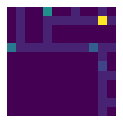

[[ 0  1  0  0  5  0  0  1  0  0  1  0]
 [ 0  1  0  0  1  1  1  1  1  1 10  1]
 [ 0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0]
 [ 4  1  1  1  1  1  1  1  1  3  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  0]]


In [23]:
ROWS = 12
COLS = 12

env = GridWorld(tot_row=ROWS, tot_col=COLS, consume_goals=1, shaffle=False)
env.reset()
env.render()
env.draw_map()